In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [7]:
train=pd.read_csv('train.csv')
test=pd.read_csv('test_data.csv')

In [8]:
print(train.shape)
print(test.shape)

(891, 12)
(100, 17)


In [9]:
test.info(),train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 17 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   100 non-null    int64  
 1   PassengerId  100 non-null    int64  
 2   Survived     100 non-null    int64  
 3   Sex          100 non-null    int64  
 4   Age          100 non-null    float64
 5   Fare         100 non-null    float64
 6   Pclass_1     100 non-null    int64  
 7   Pclass_2     100 non-null    int64  
 8   Pclass_3     100 non-null    int64  
 9   Family_size  100 non-null    float64
 10  Title_1      100 non-null    int64  
 11  Title_2      100 non-null    int64  
 12  Title_3      100 non-null    int64  
 13  Title_4      100 non-null    int64  
 14  Emb_1        100 non-null    int64  
 15  Emb_2        100 non-null    int64  
 16  Emb_3        100 non-null    int64  
dtypes: float64(3), int64(14)
memory usage: 13.4 KB
<class 'pandas.core.frame.DataFrame'>
RangeInd

(None, None)

In [10]:
train.sample(20)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
11,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,S
830,831,1,3,"Yasbeck, Mrs. Antoni (Selini Alexander)",female,15.0,1,0,2659,14.4542,NaN,C
881,882,0,3,"Markun, Mr. Johann",male,33.0,0,0,349257,7.8958,NaN,S
842,843,1,1,"Serepeca, Miss. Augusta",female,30.0,0,0,113798,31.0000,NaN,C
566,567,0,3,"Stoytcheff, Mr. Ilia",male,19.0,0,0,349205,7.8958,NaN,S
480,481,0,3,"Goodwin, Master. Harold Victor",male,9.0,5,2,CA 2144,46.9000,NaN,S
96,97,0,1,"Goldschmidt, Mr. George B",male,71.0,0,0,PC 17754,34.6542,A5,C
69,70,0,3,"Kink, Mr. Vincenz",male,26.0,2,0,315151,8.6625,NaN,S
434,435,0,1,"Silvey, Mr. William Baird",male,50.0,1,0,13507,55.9000,E44,S
867,868,0,1,"Roebling, Mr. Washington Augustus II",male,31.0,0,0,PC 17590,50.4958,A24,S


In [11]:
train.drop(columns=['Cabin'],inplace=True)

In [ ]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Embarked         2
dtype: int64

In [12]:
test.isnull().sum()

Unnamed: 0     0
PassengerId    0
Survived       0
Sex            0
Age            0
Fare           0
Pclass_1       0
Pclass_2       0
Pclass_3       0
Family_size    0
Title_1        0
Title_2        0
Title_3        0
Title_4        0
Emb_1          0
Emb_2          0
Emb_3          0
dtype: int64

In [13]:
train['Embarked'].fillna('S',inplace=True)

In [14]:
test['Fare'].fillna(test['Fare'].mean(), inplace=True)

In [15]:
df=pd.concat([train,test],sort=True).reset_index(drop=True)
df.shape

(991, 23)

In [16]:
df.head()

,Age,Emb_1,Emb_2,Emb_3,Embarked,Family_size,Fare,Name,Parch,PassengerId,...,Pclass_3,Sex,SibSp,Survived,Ticket,Title_1,Title_2,Title_3,Title_4,Unnamed: 0
0,22.0,NaN,NaN,NaN,S,NaN,7.2500,"Braund, Mr. Owen Harris",0.0,1,...,NaN,male,1.0,0,A/5 21171,NaN,NaN,NaN,NaN,NaN
1,38.0,NaN,NaN,NaN,C,NaN,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0.0,2,...,NaN,female,1.0,1,PC 17599,NaN,NaN,NaN,NaN,NaN
2,26.0,NaN,NaN,NaN,S,NaN,7.9250,"Heikkinen, Miss. Laina",0.0,3,...,NaN,female,0.0,1,STON/O2. 3101282,NaN,NaN,NaN,NaN,NaN
3,35.0,NaN,NaN,NaN,S,NaN,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0.0,4,...,NaN,female,1.0,1,113803,NaN,NaN,NaN,NaN,NaN
4,35.0,NaN,NaN,NaN,S,NaN,8.0500,"Allen, Mr. William Henry",0.0,5,...,NaN,male,0.0,0,373450,NaN,NaN,NaN,NaN,NaN


In [17]:
df.corr(numeric_only=True)['Age'].abs()

Age            1.000000
Emb_1          0.108273
Emb_2          0.052461
Emb_3          0.017493
Family_size    0.221178
Fare           0.205783
Parch          0.189119
PassengerId    0.244745
Pclass         0.369226
Pclass_1       0.338169
Pclass_2       0.062781
Pclass_3       0.236732
SibSp          0.308247
Survived       0.041232
Title_1        0.489231
Title_2        0.160954
Title_3        0.558407
Title_4        0.202910
Unnamed: 0     0.054429
Name: Age, dtype: float64

In [18]:
df_Age_mean=df.groupby(['Sex', 'Pclass']).median(numeric_only=True)['Age']
df_Age_mean

Sex     Pclass
female  1.0       35.0
        2.0       28.0
        3.0       21.5
male    1.0       40.0
        2.0       30.0
        3.0       25.0
Name: Age, dtype: float64

In [19]:
df['Age']=df.groupby(['Sex','Pclass'])['Age'].transform(lambda x: x.fillna(x.median()))
df.isnull().sum()

Age            100
Emb_1          891
Emb_2          891
Emb_3          891
Embarked       100
Family_size    891
Fare             0
Name           100
Parch          100
PassengerId      0
Pclass         100
Pclass_1       891
Pclass_2       891
Pclass_3       891
Sex              0
SibSp          100
Survived         0
Ticket         100
Title_1        891
Title_2        891
Title_3        891
Title_4        891
Unnamed: 0     891
dtype: int64

In [20]:
df['Title']=df['Name'].str.split(", ",expand=True)[1].str.split(".",expand=True)[0]
df['Title'].value_counts()

Title
Mr              517
Miss            182
Mrs             125
Master           40
Dr                7
Rev               6
Mlle              2
Major             2
Col               2
the Countess      1
Capt              1
Ms                1
Sir               1
Lady              1
Mme               1
Don               1
Jonkheer          1
Name: count, dtype: int64

In [21]:
df['Title'] = df['Title'].replace(['Lady', 'the Countess','Capt', 'Col','Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')
df['Title'] = df['Title'].replace('Mlle', 'Miss')
df['Title'] = df['Title'].replace('Ms', 'Miss')
df['Title'] = df['Title'].replace('Mme', 'Mrs')

In [22]:
df['Title'].value_counts()

Title
Mr        517
Miss      185
Mrs       126
Master     40
Rare       23
Name: count, dtype: int64

In [23]:
df['Family_size']=df['SibSp'] + df['Parch'] + 1

In [24]:
df.sample(10)

,Age,Emb_1,Emb_2,Emb_3,Embarked,Family_size,Fare,Name,Parch,PassengerId,...,Sex,SibSp,Survived,Ticket,Title_1,Title_2,Title_3,Title_4,Unnamed: 0,Title
595,36.0,NaN,NaN,NaN,S,3.0,24.150000,"Van Impe, Mr. Jean Baptiste",1.0,596,...,male,1.0,0,345773,NaN,NaN,NaN,NaN,NaN,Mr
307,17.0,NaN,NaN,NaN,C,2.0,108.900000,"Penasco y Castellana, Mrs. Victor de Satode (M...",0.0,308,...,female,1.0,1,PC 17758,NaN,NaN,NaN,NaN,NaN,Mrs
401,26.0,NaN,NaN,NaN,S,1.0,8.050000,"Adams, Mr. John",0.0,402,...,male,0.0,0,341826,NaN,NaN,NaN,NaN,NaN,Mr
932,NaN,1.0,0.0,0.0,NaN,NaN,0.014110,NaN,NaN,833,...,1,NaN,0,NaN,1.0,0.0,0.0,0.0,832.0,NaN
84,17.0,NaN,NaN,NaN,S,1.0,10.500000,"Ilett, Miss. Bertha",0.0,85,...,female,0.0,1,SO/C 14885,NaN,NaN,NaN,NaN,NaN,Miss
963,NaN,0.0,0.0,1.0,NaN,NaN,0.135753,NaN,NaN,864,...,0,NaN,0,NaN,0.0,0.0,0.0,1.0,863.0,NaN
549,8.0,NaN,NaN,NaN,S,3.0,36.750000,"Davies, Master. John Morgan Jr",1.0,550,...,male,1.0,1,C.A. 33112,NaN,NaN,NaN,NaN,NaN,Master
111,14.5,NaN,NaN,NaN,C,2.0,14.454200,"Zabour, Miss. Hileni",0.0,112,...,female,1.0,0,2665,NaN,NaN,NaN,NaN,NaN,Miss
206,32.0,NaN,NaN,NaN,S,2.0,15.850000,"Backstrom, Mr. Karl Alfred",0.0,207,...,male,1.0,0,3101278,NaN,NaN,NaN,NaN,NaN,Mr
470,25.0,NaN,NaN,NaN,S,1.0,7.250000,"Keefe, Mr. Arthur",0.0,471,...,male,0.0,0,323592,NaN,NaN,NaN,NaN,NaN,Mr


In [25]:
df.drop(columns=['Name','Parch','SibSp','Ticket'],inplace=True)
df.sample(10)

,Age,Emb_1,Emb_2,Emb_3,Embarked,Family_size,Fare,PassengerId,Pclass,Pclass_1,Pclass_2,Pclass_3,Sex,Survived,Title_1,Title_2,Title_3,Title_4,Unnamed: 0,Title
332,38.0,NaN,NaN,NaN,S,2.0,153.462500,333,1.0,NaN,NaN,NaN,male,0,NaN,NaN,NaN,NaN,NaN,Mr
726,30.0,NaN,NaN,NaN,S,4.0,21.000000,727,2.0,NaN,NaN,NaN,female,1,NaN,NaN,NaN,NaN,NaN,Mrs
693,25.0,NaN,NaN,NaN,C,1.0,7.225000,694,3.0,NaN,NaN,NaN,male,0,NaN,NaN,NaN,NaN,NaN,Mr
762,20.0,NaN,NaN,NaN,C,1.0,7.229200,763,3.0,NaN,NaN,NaN,male,1,NaN,NaN,NaN,NaN,NaN,Mr
15,55.0,NaN,NaN,NaN,S,1.0,16.000000,16,2.0,NaN,NaN,NaN,female,1,NaN,NaN,NaN,NaN,NaN,Mrs
85,33.0,NaN,NaN,NaN,S,4.0,15.850000,86,3.0,NaN,NaN,NaN,female,1,NaN,NaN,NaN,NaN,NaN,Mrs
983,NaN,0.0,0.0,1.0,NaN,NaN,0.020495,884,NaN,0.0,1.0,0.0,1,0,1.0,0.0,0.0,0.0,883.0,NaN
624,21.0,NaN,NaN,NaN,S,1.0,16.100000,625,3.0,NaN,NaN,NaN,male,0,NaN,NaN,NaN,NaN,NaN,Mr
531,25.0,NaN,NaN,NaN,C,1.0,7.229200,532,3.0,NaN,NaN,NaN,male,0,NaN,NaN,NaN,NaN,NaN,Mr
348,3.0,NaN,NaN,NaN,S,3.0,15.900000,349,3.0,NaN,NaN,NaN,male,1,NaN,NaN,NaN,NaN,NaN,Master


In [26]:
def family_size(number):
    if number==1:
        return "Alone"
    elif number > 1 and number < 5:
        return "Small"
    else:
        return "Large"

In [27]:
df['Family_size']=df['Family_size'].apply(family_size)

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 991 entries, 0 to 990
Data columns (total 20 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          891 non-null    float64
 1   Emb_1        100 non-null    float64
 2   Emb_2        100 non-null    float64
 3   Emb_3        100 non-null    float64
 4   Embarked     891 non-null    object 
 5   Family_size  991 non-null    object 
 6   Fare         991 non-null    float64
 7   PassengerId  991 non-null    int64  
 8   Pclass       891 non-null    float64
 9   Pclass_1     100 non-null    float64
 10  Pclass_2     100 non-null    float64
 11  Pclass_3     100 non-null    float64
 12  Sex          991 non-null    object 
 13  Survived     991 non-null    int64  
 14  Title_1      100 non-null    float64
 15  Title_2      100 non-null    float64
 16  Title_3      100 non-null    float64
 17  Title_4      100 non-null    float64
 18  Unnamed: 0   100 non-null    float64
 19  Title   

In [29]:
df['Age'] = df['Age'].astype('int64')

IntCastingNaNError: Cannot convert non-finite values (NA or inf) to integer

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 991 entries, 0 to 990
Data columns (total 20 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          891 non-null    float64
 1   Emb_1        100 non-null    float64
 2   Emb_2        100 non-null    float64
 3   Emb_3        100 non-null    float64
 4   Embarked     891 non-null    object 
 5   Family_size  991 non-null    object 
 6   Fare         991 non-null    float64
 7   PassengerId  991 non-null    int64  
 8   Pclass       891 non-null    float64
 9   Pclass_1     100 non-null    float64
 10  Pclass_2     100 non-null    float64
 11  Pclass_3     100 non-null    float64
 12  Sex          991 non-null    object 
 13  Survived     991 non-null    int64  
 14  Title_1      100 non-null    float64
 15  Title_2      100 non-null    float64
 16  Title_3      100 non-null    float64
 17  Title_4      100 non-null    float64
 18  Unnamed: 0   100 non-null    float64
 19  Title   

In [31]:
col=['Embarked','Pclass','Sex','Title','Family_size']
for i in col:
    print('Survival Correlation by:', i)
    df2=df.groupby(i)['Survived'].mean().reset_index()
    print(df2)
    print('-'*10, '\n')

Survival Correlation by: Embarked
  Embarked  Survived
0        C  0.553571
1        Q  0.389610
2        S  0.339009
---------- 

Survival Correlation by: Pclass
   Pclass  Survived
0     1.0  0.629630
1     2.0  0.472826
2     3.0  0.242363
---------- 

Survival Correlation by: Sex
      Sex  Survived
0       0  0.685714
1       1  0.184615
2  female  0.742038
3    male  0.188908
---------- 

Survival Correlation by: Title
    Title  Survived
0  Master  0.575000
1    Miss  0.702703
2      Mr  0.156673
3     Mrs  0.793651
4    Rare  0.347826
---------- 

Survival Correlation by: Family_size
  Family_size  Survived
0       Alone  0.303538
1       Large  0.283951
2       Small  0.578767
---------- 



In [32]:
import plotly.express as px
import plotly.graph_objects as go


fig = go.Figure()

fig.add_trace(go.Histogram(x=df[df['Survived']==0]['Age'], name='Not Survived', opacity=0.5))
fig.add_trace(go.Histogram(x=df[df['Survived']==1]['Age'], name='Survived', opacity=0.5))

fig.update_layout(
    title='Age Distribution by Survival',
    xaxis_title='Age',
    yaxis_title='Density',
    barmode='overlay',
    bargap=0.1,
)

fig.show()

In [33]:
fig = go.Figure()

fig.add_trace(go.Histogram(x=df[df['Survived'] == 0]['Fare'], name='Not Survived', opacity=0.5))
fig.add_trace(go.Histogram(x=df[df['Survived'] == 1]['Fare'], name='Survived', opacity=0.5))

fig.update_layout(
    title='Fare Distribution by Survival',
    xaxis_title='Fare',
    yaxis_title='Density',
    barmode='overlay',
    bargap=0.1,
)

fig.show()
fig

In [34]:
fig = go.Figure()

fig.add_trace(go.Histogram(x=df[df['Survived'] == 0]['Family_size'], name='Not Survived', opacity=0.5))
fig.add_trace(go.Histogram(x=df[df['Survived'] == 1]['Family_size'], name='Survived', opacity=0.5))

fig.update_layout(
    title='Family Size Distribution by Survival',
    xaxis_title='Family Size',
    yaxis_title='Density',
    barmode='overlay',
    bargap=0.1,
)

fig.show()

In [36]:
from plotly.subplots import make_subplots
col = ['Embarked', 'Pclass', 'Sex', 'Title']

fig = make_subplots(rows=1, cols=len(col), subplot_titles=col)

for i, c in enumerate(col, start=1):
    grouped_data = df.groupby([c, 'Survived']).size().reset_index(name='Count')

    survived_data = grouped_data[grouped_data['Survived'] == 1]
    not_survived_data = grouped_data[grouped_data['Survived'] == 0]

    fig.add_trace(go.Bar(x=survived_data[c], y=survived_data['Count'], name='Survived', marker_color='green'), row=1, col=i)
    fig.add_trace(go.Bar(x=not_survived_data[c], y=not_survived_data['Count'], name='Not Survived', marker_color='red'), row=1, col=i)

    fig.update_xaxes(title_text=c, row=1, col=i)
    fig.update_yaxes(title_text='Count', row=1, col=i)

    # Update figure layout
    fig.update_layout(
    title='Countplot of Categorical Variables by Survival',
    height=400,
    showlegend=True,
    barmode='group',
    )

    # Show figure
fig.show()


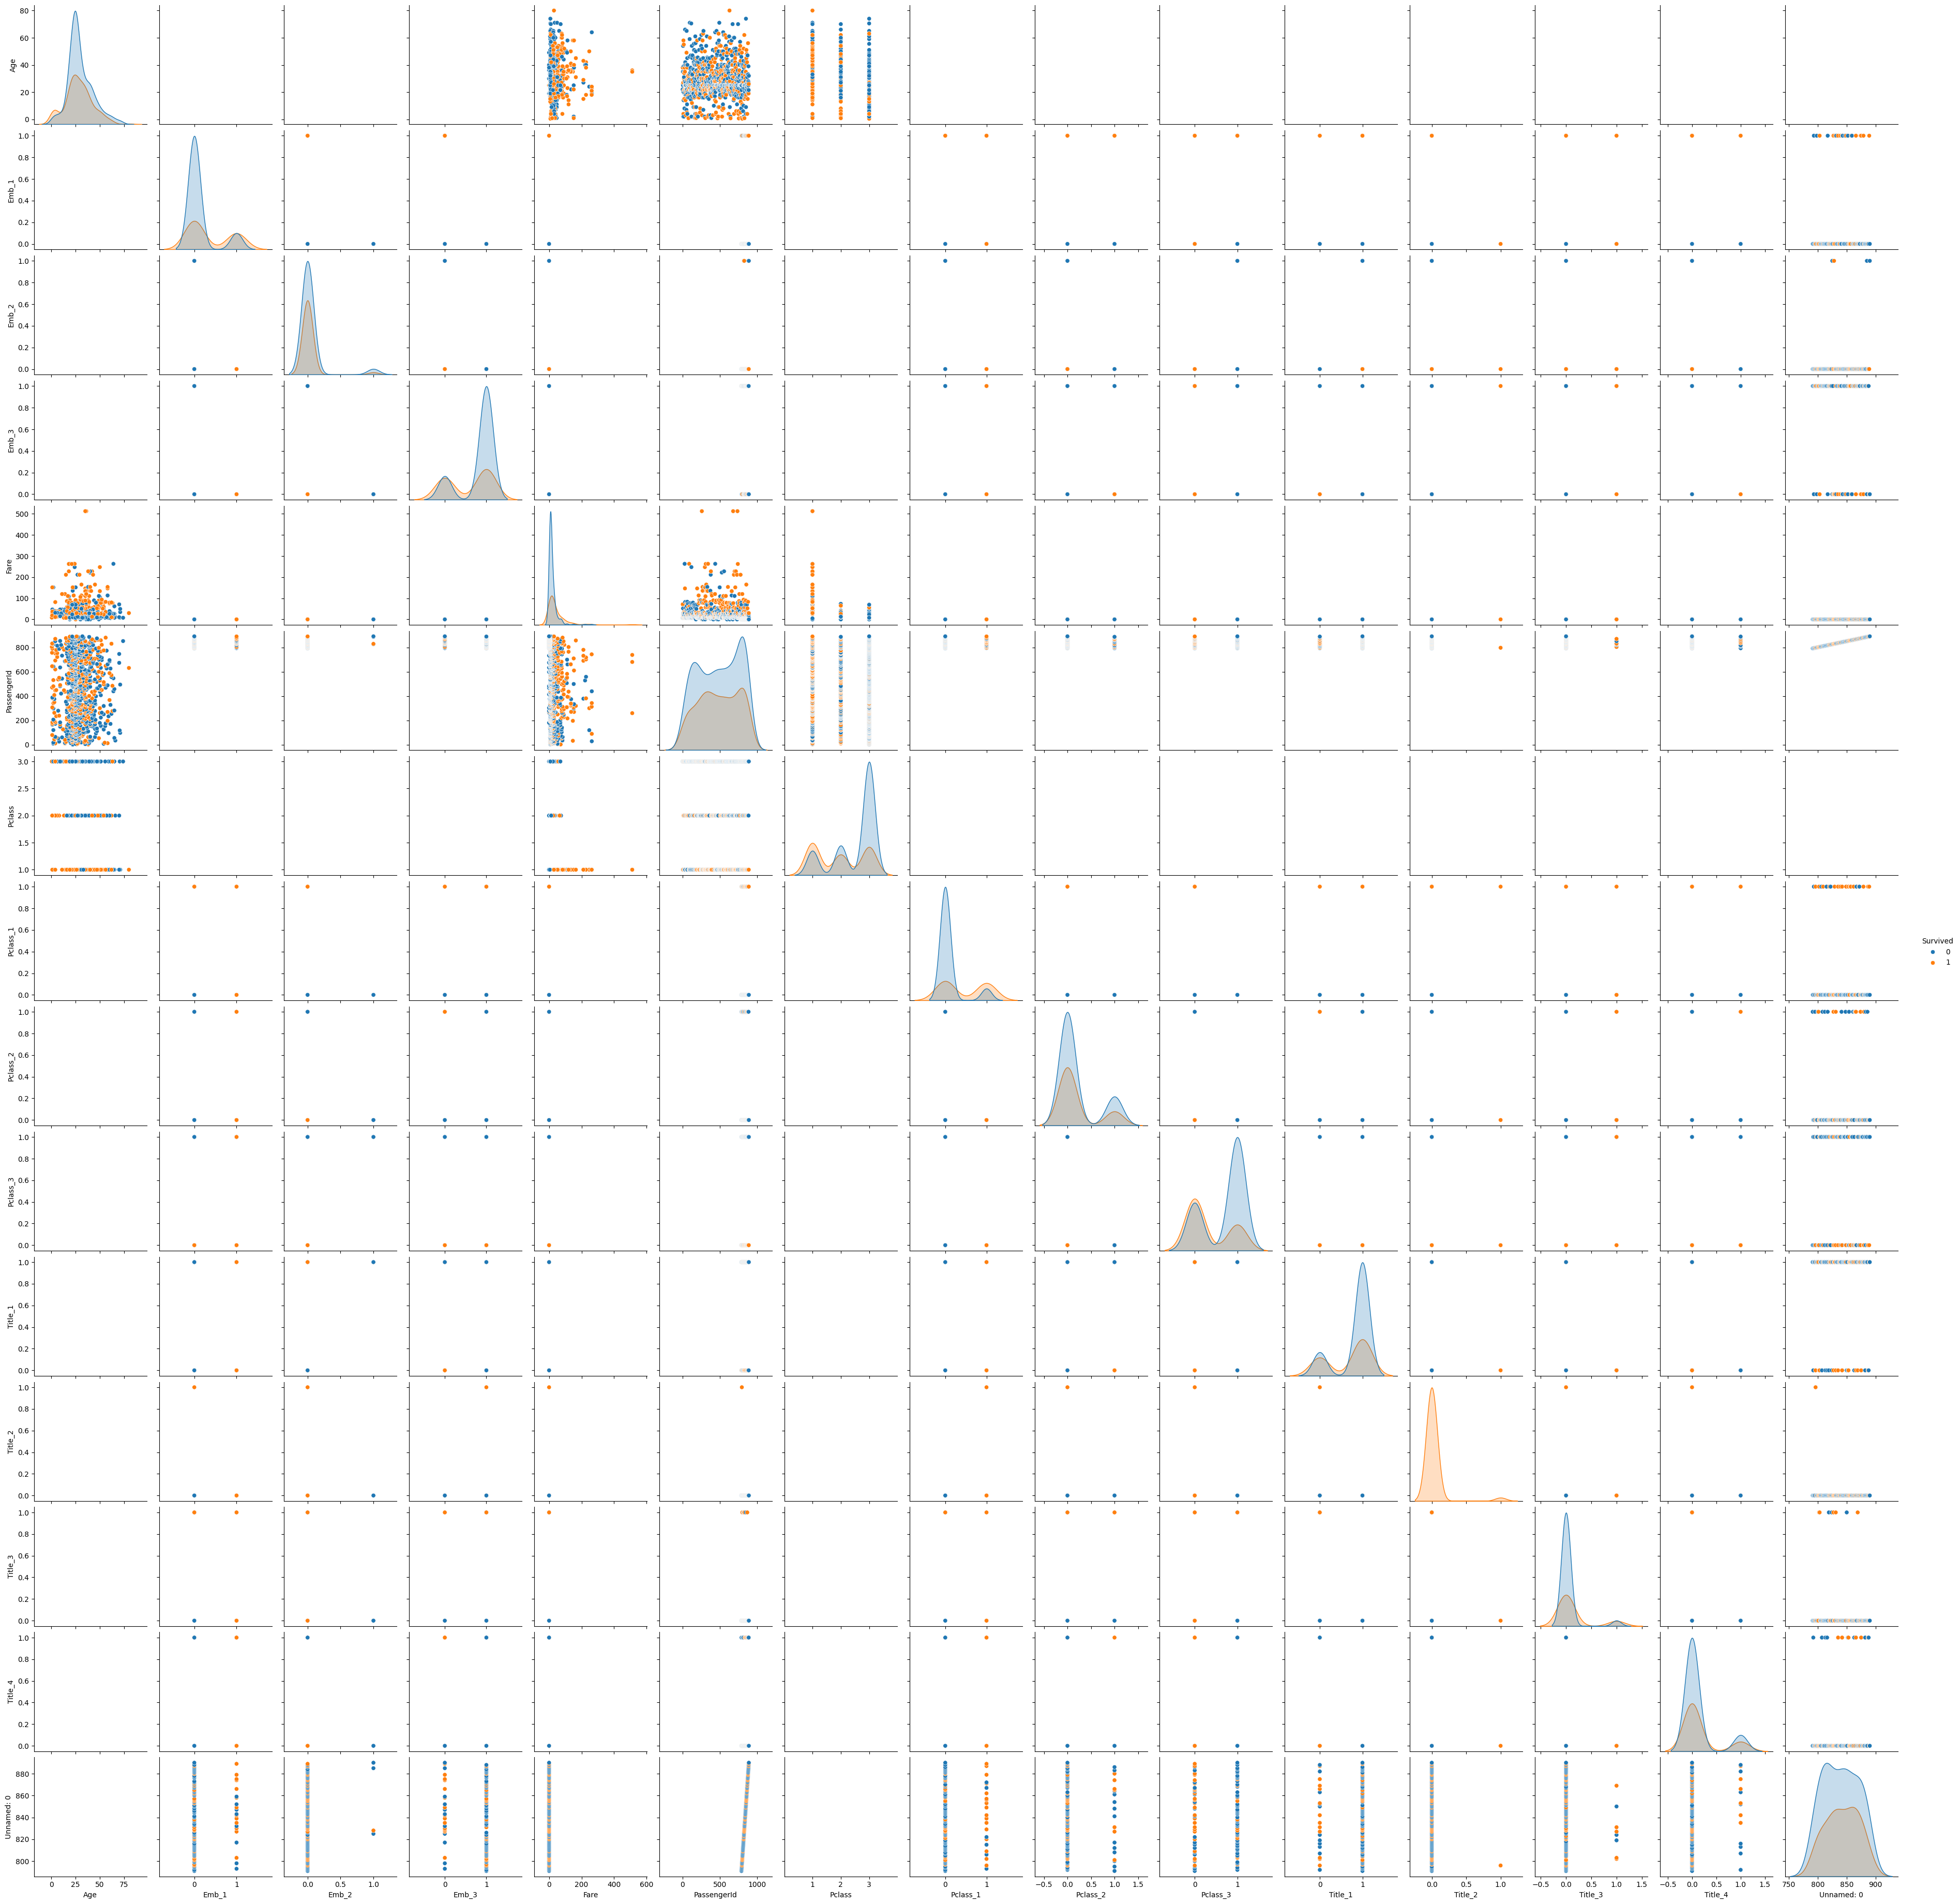

In [37]:
sns.pairplot(df,hue='Survived')

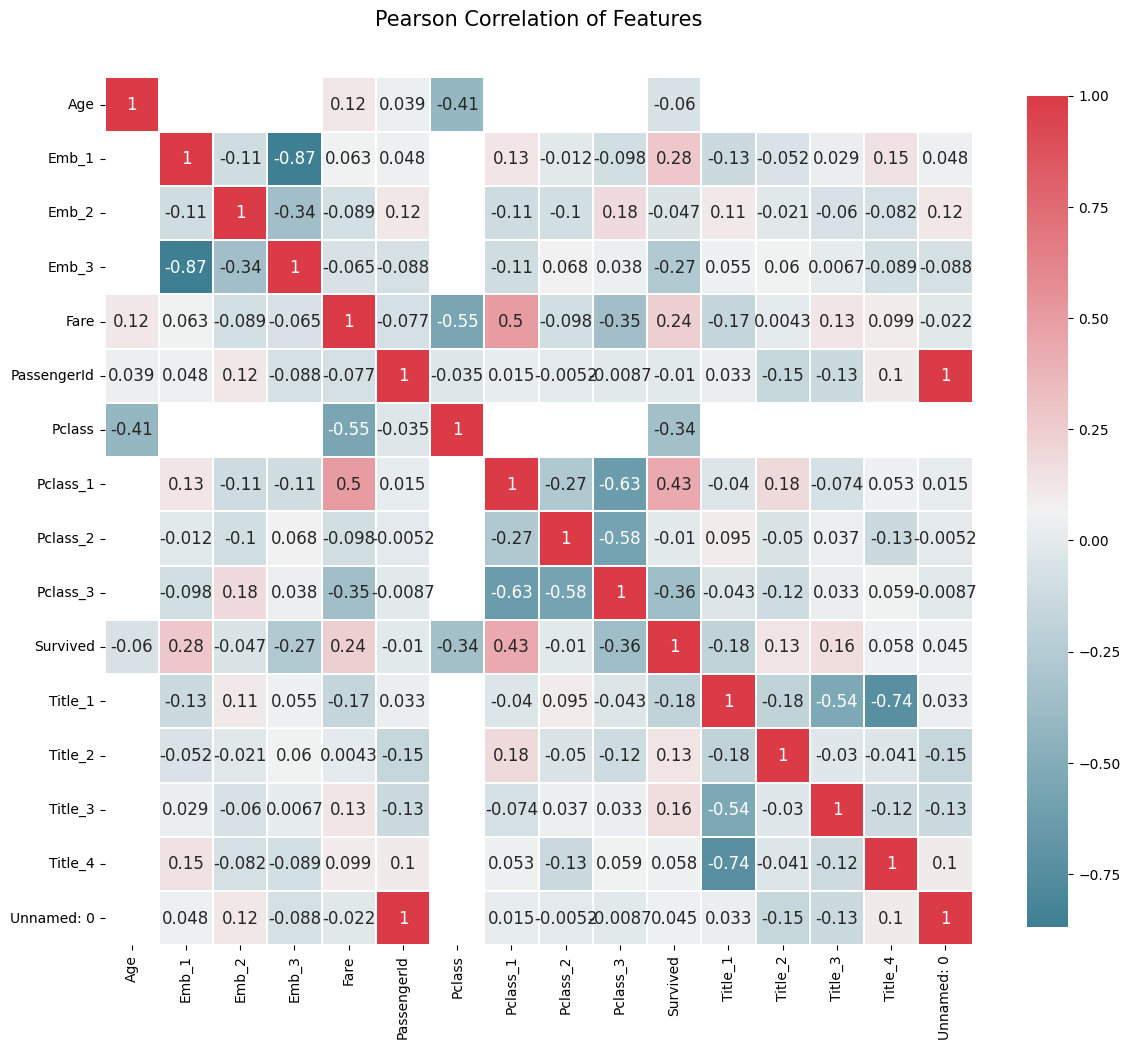

In [38]:
def correlation_heatmap(df):
    _ , ax = plt.subplots(figsize =(14, 12))
    colormap = sns.diverging_palette(220, 10, as_cmap = True)

    _ = sns.heatmap(
        df.corr(numeric_only=True),
        cmap = colormap,
        square=True,
        cbar_kws={'shrink':.9 },
        ax=ax,
        annot=True,
        linewidths=0.1,vmax=1.0, linecolor='white',
        annot_kws={'fontsize':12 }
    )

    plt.title('Pearson Correlation of Features', y=1.05, size=15)

correlation_heatmap(df)


In [39]:
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import MinMaxScaler,StandardScaler
from sklearn.pipeline import Pipeline,make_pipeline
from sklearn.feature_selection import SelectKBest,chi2
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import Binarizer
from sklearn.preprocessing import KBinsDiscretizer
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.metrics import accuracy_score
from sklearn import ensemble
from sklearn import gaussian_process
from sklearn import linear_model
from sklearn import naive_bayes
from sklearn import neighbors
from sklearn import svm
from sklearn import tree
from sklearn import discriminant_analysis
from xgboost import XGBClassifier
from sklearn.model_selection import cross_val_score

In [40]:
df.head()

,Age,Emb_1,Emb_2,Emb_3,Embarked,Family_size,Fare,PassengerId,Pclass,Pclass_1,Pclass_2,Pclass_3,Sex,Survived,Title_1,Title_2,Title_3,Title_4,Unnamed: 0,Title
0,22.0,NaN,NaN,NaN,S,Small,7.2500,1,3.0,NaN,NaN,NaN,male,0,NaN,NaN,NaN,NaN,NaN,Mr
1,38.0,NaN,NaN,NaN,C,Small,71.2833,2,1.0,NaN,NaN,NaN,female,1,NaN,NaN,NaN,NaN,NaN,Mrs
2,26.0,NaN,NaN,NaN,S,Alone,7.9250,3,3.0,NaN,NaN,NaN,female,1,NaN,NaN,NaN,NaN,NaN,Miss
3,35.0,NaN,NaN,NaN,S,Small,53.1000,4,1.0,NaN,NaN,NaN,female,1,NaN,NaN,NaN,NaN,NaN,Mrs
4,35.0,NaN,NaN,NaN,S,Alone,8.0500,5,3.0,NaN,NaN,NaN,male,0,NaN,NaN,NaN,NaN,NaN,Mr


In [41]:
train = df.loc[:890]
test = df.loc[891:]

In [42]:
test.head()

,Age,Emb_1,Emb_2,Emb_3,Embarked,Family_size,Fare,PassengerId,Pclass,Pclass_1,Pclass_2,Pclass_3,Sex,Survived,Title_1,Title_2,Title_3,Title_4,Unnamed: 0,Title
891,NaN,0.0,0.0,1.0,NaN,Large,0.050749,792,NaN,0.0,1.0,0.0,1,0,1.0,0.0,0.0,0.0,791.0,NaN
892,NaN,0.0,0.0,1.0,NaN,Large,0.135753,793,NaN,0.0,0.0,1.0,0,0,0.0,0.0,0.0,1.0,792.0,NaN
893,NaN,1.0,0.0,0.0,NaN,Large,0.059914,794,NaN,1.0,0.0,0.0,1,0,1.0,0.0,0.0,0.0,793.0,NaN
894,NaN,0.0,0.0,1.0,NaN,Large,0.015412,795,NaN,0.0,0.0,1.0,1,0,1.0,0.0,0.0,0.0,794.0,NaN
895,NaN,0.0,0.0,1.0,NaN,Large,0.025374,796,NaN,0.0,1.0,0.0,1,0,1.0,0.0,0.0,0.0,795.0,NaN


In [43]:
test.drop(columns=['Survived'],inplace=True)
train['Survived'] = train['Survived'].astype('int64')
train.head()

,Age,Emb_1,Emb_2,Emb_3,Embarked,Family_size,Fare,PassengerId,Pclass,Pclass_1,Pclass_2,Pclass_3,Sex,Survived,Title_1,Title_2,Title_3,Title_4,Unnamed: 0,Title
0,22.0,NaN,NaN,NaN,S,Small,7.2500,1,3.0,NaN,NaN,NaN,male,0,NaN,NaN,NaN,NaN,NaN,Mr
1,38.0,NaN,NaN,NaN,C,Small,71.2833,2,1.0,NaN,NaN,NaN,female,1,NaN,NaN,NaN,NaN,NaN,Mrs
2,26.0,NaN,NaN,NaN,S,Alone,7.9250,3,3.0,NaN,NaN,NaN,female,1,NaN,NaN,NaN,NaN,NaN,Miss
3,35.0,NaN,NaN,NaN,S,Small,53.1000,4,1.0,NaN,NaN,NaN,female,1,NaN,NaN,NaN,NaN,NaN,Mrs
4,35.0,NaN,NaN,NaN,S,Alone,8.0500,5,3.0,NaN,NaN,NaN,male,0,NaN,NaN,NaN,NaN,NaN,Mr


In [44]:
train.shape,test.shape

((891, 20), (100, 19))

In [45]:
train = train.drop("PassengerId", axis=1)
X_train = train.drop("Survived", axis=1)
y_train = train["Survived"]
X_train.head()

,Age,Emb_1,Emb_2,Emb_3,Embarked,Family_size,Fare,Pclass,Pclass_1,Pclass_2,Pclass_3,Sex,Title_1,Title_2,Title_3,Title_4,Unnamed: 0,Title
0,22.0,NaN,NaN,NaN,S,Small,7.2500,3.0,NaN,NaN,NaN,male,NaN,NaN,NaN,NaN,NaN,Mr
1,38.0,NaN,NaN,NaN,C,Small,71.2833,1.0,NaN,NaN,NaN,female,NaN,NaN,NaN,NaN,NaN,Mrs
2,26.0,NaN,NaN,NaN,S,Alone,7.9250,3.0,NaN,NaN,NaN,female,NaN,NaN,NaN,NaN,NaN,Miss
3,35.0,NaN,NaN,NaN,S,Small,53.1000,1.0,NaN,NaN,NaN,female,NaN,NaN,NaN,NaN,NaN,Mrs
4,35.0,NaN,NaN,NaN,S,Alone,8.0500,3.0,NaN,NaN,NaN,male,NaN,NaN,NaN,NaN,NaN,Mr


In [46]:
X_train.shape,y_train.shape

((891, 18), (891,))